In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.drop([1925,1188],inplace=True)

In [4]:
test=pd.read_csv("test.csv")

In [5]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)

/home/sirzechlucifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data["AvgAirTemp"]=data["AvgAirTemp"].fillna(data.groupby('Season')['AvgAirTemp'].transform("mean"))
data["AvgDewPt"]=data["AvgDewPt"].fillna(data.groupby('Season')['AvgDewPt'].transform("mean"))
data["AvgDewPtKurt"]=data["AvgDewPtKurt"].fillna(data.groupby("Season")["AvgDewPtKurt"].transform("mean"))
data["AvgDewPtSkew"]=data["AvgDewPtSkew"].fillna(data.groupby("Season")["AvgDewPtSkew"].transform("mean"))
data["AvgPrec"]=data["AvgPrec"].fillna(data.groupby("Year")["AvgPrec"].transform("mean"))
data["AvgPrecKurt"]=data["AvgPrecKurt"].fillna(data.groupby("Year")["AvgPrecKurt"].transform("mean"))
data["AvgPrecSkew"]=data["AvgPrecSkew"].fillna(data.groupby("Year")["AvgPrecSkew"].transform("mean"))
data["AvgRelHum"]=data["AvgRelHum"].fillna(data.groupby("Season")["AvgRelHum"].transform("mean"))
data["AvgRelHumKurt"]=data["AvgRelHumKurt"].fillna(data.groupby("Season")["AvgRelHumKurt"].transform("mean"))
data["AvgRelHumSkew"]=data["AvgRelHumSkew"].fillna(data.groupby("Season")["AvgRelHumSkew"].transform("mean"))
data["AvgTempKurt"]=data["AvgTempKurt"].fillna(data.groupby("Season")["AvgTempKurt"].transform("mean"))
data["AvgTempSkew"]=data["AvgTempSkew"].fillna(data.groupby("Season")["AvgRelHumSkew"].transform("mean"))
data["MinAirTemp"]=data["MinAirTemp"].fillna(data.groupby("Season")["MinAirTemp"].transform("min"))
data["MaxAirTemp"]=data["MaxAirTemp"].fillna(data.groupby("Season")["MaxAirTemp"].transform("max"))
data["AvgWind"]=data["AvgWind"].fillna(data.groupby("Season")["AvgWind"].transform("mean"))

In [7]:
train_test=[data]
season_map={"Kharif":2,"Rabi":1,"Summer":3,"Whole year":4}
for gr in train_test:
    gr["Season"]=gr["Season"].map(season_map)

In [8]:
data["Season"].astype('int64',copy=False)
data.drop(["District","Crop","Year","MinAirTemp","MaxAirTemp","AvgWind","Season","AvgTempKurt","AvgTempSkew","AvgRelHumSkew","AvgRelHumKurt"],inplace=True,axis=1)
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/home/sirzechlucifer/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
ID=test["ID"]
target=train["Yield"]
train.drop(["ID","Yield"],inplace=True,axis=1)
test.drop(["ID","Yield"],inplace=True,axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#train_1,cross_val,target_train,target_crossval=train_test_split(train,target,test_size=0.20,shuffle=True)
#cross_val1,test_crossval,target_crossval1,target_test=train_test_split(cross_val,target_crossval,test_size=0.1,shuffle=True)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout


/home/sirzechlucifer/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
ss=StandardScaler()
train=ss.fit_transform(train)
test=ss.fit_transform(test)

In [15]:
#train_1,cross_val,target_train,target_crossval=train_test_split(train,target,test_size=0.20,shuffle=True)
#cross_val1,test_crossval,target_crossval1,target_test=train_test_split(cross_val,target_crossval,test_size=0.1,shuffle=True)
from keras import metrics
from keras  import callbacks
from keras.callbacks import EarlyStopping
from keras import optimizers

Train on 1989 samples, validate on 853 samples
Epoch 1/100
1989/1989 [==============================] - 0s 228us/step - loss: 3.8456 - mean_absolute_error: 3.8456 - val_loss: 2.8044 - val_mean_absolute_error: 2.8044
Epoch 2/100
1989/1989 [==============================] - 0s 111us/step - loss: 3.7893 - mean_absolute_error: 3.7893 - val_loss: 2.7899 - val_mean_absolute_error: 2.7899
Epoch 3/100
1989/1989 [==============================] - 0s 110us/step - loss: 3.7730 - mean_absolute_error: 3.7730 - val_loss: 2.7825 - val_mean_absolute_error: 2.7825
Epoch 4/100
1989/1989 [==============================] - 0s 109us/step - loss: 3.7649 - mean_absolute_error: 3.7649 - val_loss: 2.7769 - val_mean_absolute_error: 2.7769
Epoch 5/100
1989/1989 [==============================] - 0s 114us/step - loss: 3.7567 - mean_absolute_error: 3.7567 - val_loss: 2.7714 - val_mean_absolute_error: 2.7714
Epoch 6/100
1989/1989 [==============================] - 0s 104us/step - loss: 3.7492 - mean_absolute_error:

Epoch 49/100
1989/1989 [==============================] - 0s 114us/step - loss: 3.6632 - mean_absolute_error: 3.6632 - val_loss: 2.7363 - val_mean_absolute_error: 2.7363
Epoch 50/100
1989/1989 [==============================] - 0s 114us/step - loss: 3.6579 - mean_absolute_error: 3.6579 - val_loss: 2.7378 - val_mean_absolute_error: 2.7378
Epoch 51/100
1989/1989 [==============================] - 0s 112us/step - loss: 3.6641 - mean_absolute_error: 3.6641 - val_loss: 2.7347 - val_mean_absolute_error: 2.7347
Epoch 52/100
1989/1989 [==============================] - 0s 109us/step - loss: 3.6649 - mean_absolute_error: 3.6649 - val_loss: 2.7372 - val_mean_absolute_error: 2.7372
Epoch 53/100
1989/1989 [==============================] - 0s 106us/step - loss: 3.6598 - mean_absolute_error: 3.6598 - val_loss: 2.7377 - val_mean_absolute_error: 2.7377
Epoch 54/100
1989/1989 [==============================] - 0s 107us/step - loss: 3.6712 - mean_absolute_error: 3.6712 - val_loss: 2.7346 - val_mean_abs

1989/1989 [==============================] - 0s 104us/step - loss: 3.6422 - mean_absolute_error: 3.6422 - val_loss: 2.7573 - val_mean_absolute_error: 2.7573
Epoch 98/100
1989/1989 [==============================] - 0s 104us/step - loss: 3.6420 - mean_absolute_error: 3.6420 - val_loss: 2.7516 - val_mean_absolute_error: 2.7516
Epoch 99/100
1989/1989 [==============================] - 0s 112us/step - loss: 3.6401 - mean_absolute_error: 3.6401 - val_loss: 2.7545 - val_mean_absolute_error: 2.7545
Epoch 100/100
1989/1989 [==============================] - 0s 113us/step - loss: 3.6350 - mean_absolute_error: 3.6350 - val_loss: 2.7485 - val_mean_absolute_error: 2.7485


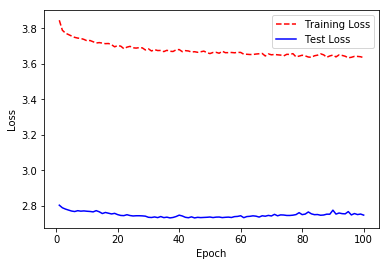

In [16]:

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

model = Sequential()
model.add(Dense(30, input_dim=8, activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
adam=optimizers.Adam()
model.compile(loss='mae', optimizer=adam,metrics=[metrics.mae])
history=model.fit(train, target, validation_split=0.3, epochs=100, batch_size=10, verbose=1)
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [17]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split

In [18]:
#train_1,cross_val,target_train,target_crossval=train_test_split(train,target,test_size=0.20,shuffle=True)
#cross_val1,test_crossval,target_crossval1,target_test=train_test_split(cross_val,target_crossval,test_size=0.1,shuffle=True)
#model.fit(train,target,epochs=5,shuffle=True)
#predictions=model.predict(cross_val1)
#print("The mean absolute error is:"+str(mean_absolute_error(predictions,target_crossval1)))
#final_pred=model.predict(test_crossval)
#print("The mean absolute test error is:"+str(mean_absolute_error(final_pred,target_test)))

In [19]:
final_predictions=model.predict(test)

In [20]:
final_predictions=final_predictions.flatten()

In [21]:
final_predictions.shape

(1897,)

In [22]:
submission = pd.DataFrame({"Id":ID,"Yield": final_predictions})
submission.to_csv('final.csv', index=False)